# Template for DeepLearning project


## 1. Load Dataset
First, load your dataset and show a few examples to familiarize with the data.
After that, compute a few statisticts, e. g. of the class labels, to check data for imbalance.
Finally, split your dataset into training, validatian and test set.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
import torch

%matplotlib inline

/Users/iabaer/mambaforge/envs/mse/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

(60000, 28, 28)


In [3]:
n_classes = 10
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## TensorFlow

In [4]:
D = X_train.shape[1:]
print(D)

cnn = Sequential()
cnn.add(keras.layers.Normalization(axis=1, input_shape=D))
cnn.add(keras.layers.Conv2D(32, kernel_size=3, input_shape=D, padding='same', kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)))
cnn.add(keras.layers.BatchNormalization())
cnn.add(keras.layers.Activation('tanh'))
cnn.add(keras.layers.Conv2D(32, kernel_size=3, input_shape=D, padding='same', kernel_regularizer=keras.regularizers.L1L2(l1=1e-4, l2=1e-4)))
cnn.add(keras.layers.BatchNormalization())
cnn.add(keras.layers.Activation('tanh'))
cnn.add(keras.layers.MaxPooling2D(2))
cnn.add(keras.layers.Conv2D(32, kernel_size=3, input_shape=D, padding='same'))
cnn.add(keras.layers.BatchNormalization())
cnn.add(keras.layers.Activation('tanh'))
cnn.add(keras.layers.MaxPooling2D(2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(100, activation='tanh', kernel_regularizer=keras.regularizers.L2(1e-4)))
cnn.add(keras.layers.Dense(n_classes, activation='softmax'))

cnn.summary()

(28, 28, 1)
Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 28, 28, 1)        57        
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_nor

2022-04-19 16:48:49.400384: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-19 16:48:49.400499: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = cnn.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10


2022-04-19 16:48:49.577511: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-19 16:48:49.927905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.4700 - accuracy: 0.8576

2022-04-19 16:48:59.188135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 10s 21ms/step - loss: 0.4700 - accuracy: 0.8576 - val_loss: 0.4032 - val_accuracy: 0.8821
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.3309 - accuracy: 0.9075 - val_loss: 0.3697 - val_accuracy: 0.8845
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2890 - accuracy: 0.9183 - val_loss: 0.3150 - val_accuracy: 0.9090
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2581 - accuracy: 0.9291 - val_loss: 0.3167 - val_accuracy: 0.9056
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2338 - accuracy: 0.9366 - val_loss: 0.2938 - val_accuracy: 0.9135
Epoch 6/10
469/469 [==============================] - 10s 20ms/step - loss: 0.2164 - accuracy: 0.9424 - val_loss: 0.3096 - val_accuracy: 0.9062
Epoch 7/10
469/469 [==============================] - 10s 20ms/step - loss: 0.1991 - accuracy: 0.9492 - val_loss: 0.2716 - val_accuracy: 0.9219
Epo

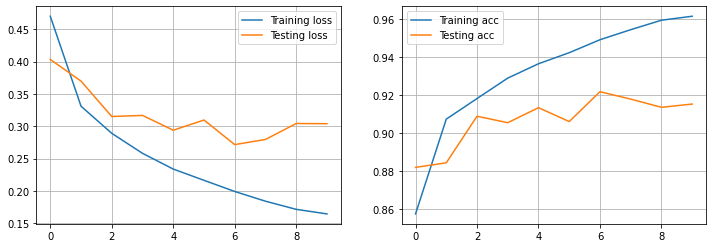

In [6]:
f = plt.figure(figsize=(12,4))
f.title='Default Parameter initialization'
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [12]:
from keras import initializers
initializers = [
    ("(Zero/Zero)", initializers.Zeros(), initializers.Zeros(), 'tanh'),
    ("(RandomNormal/Zero)", initializers.RandomNormal(), initializers.Zeros(), 'tanh'),
    ("(Uniform/Zero)", initializers.RandomUniform(-0.5, 0.5), initializers.Zeros(), 'tanh'),
    ("(XavierGlorot/Zero)", initializers.GlorotNormal(seed=42), initializers.Zeros(), 'tanh'),
    ("(KaimingHe/Zero)", initializers.HeNormal(seed=42), initializers.Zeros(), 'relu'),
]

results = {}

for name, kernel_initializer, bias_initializer, activation in initializers:
    D = X_train.shape[1:]
    print(D)

    cnn = Sequential()
    cnn.add(keras.layers.Normalization(axis=1, input_shape=D))
    cnn.add(keras.layers.Conv2D(32, kernel_size=3, input_shape=D, padding='same', kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
    cnn.add(keras.layers.BatchNormalization())
    cnn.add(keras.layers.Activation(activation))
    cnn.add(keras.layers.Conv2D(32, kernel_size=3, input_shape=D, padding='same', kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
    cnn.add(keras.layers.BatchNormalization())
    cnn.add(keras.layers.Activation(activation))
    cnn.add(keras.layers.MaxPooling2D(2))
    cnn.add(keras.layers.Conv2D(32, kernel_size=3, input_shape=D, padding='same', kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))
    cnn.add(keras.layers.BatchNormalization())
    cnn.add(keras.layers.Activation(activation))
    cnn.add(keras.layers.MaxPooling2D(2))
    cnn.add(keras.layers.Flatten())
    cnn.add(keras.layers.Dense(100, activation=activation, kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, kernel_regularizer=keras.regularizers.L2(1e-5)))
    cnn.add(keras.layers.Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))

    results[name] = (None, None)
    summary = cnn.summary()

    cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    log = cnn.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))
    results[name] = (summary, log)

(28, 28, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 28, 28, 1)        57        
 ion)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_10 (Bat  (None, 28, 2

2022-04-19 16:52:31.298445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.0980

2022-04-19 16:52:41.225138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 11s 23ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epo

2022-04-19 16:54:11.474442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.4447 - accuracy: 0.8514

2022-04-19 16:54:20.748737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 10s 21ms/step - loss: 0.4447 - accuracy: 0.8514 - val_loss: 0.4213 - val_accuracy: 0.8523
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2779 - accuracy: 0.9042 - val_loss: 0.2791 - val_accuracy: 0.9040
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2379 - accuracy: 0.9197 - val_loss: 0.2744 - val_accuracy: 0.9049
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2140 - accuracy: 0.9277 - val_loss: 0.2688 - val_accuracy: 0.9096
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.1913 - accuracy: 0.9357 - val_loss: 0.2602 - val_accuracy: 0.9106
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1743 - accuracy: 0.9424 - val_loss: 0.2393 - val_accuracy: 0.9205
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1548 - accuracy: 0.9508 - val_loss: 0.2447 - val_accuracy: 0.9182
Epo

2022-04-19 16:55:50.954450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.8640 - accuracy: 0.7793

2022-04-19 16:56:00.295690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 10s 21ms/step - loss: 0.8640 - accuracy: 0.7793 - val_loss: 0.7183 - val_accuracy: 0.8221
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.6429 - accuracy: 0.8530 - val_loss: 0.6380 - val_accuracy: 0.8518
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.5799 - accuracy: 0.8734 - val_loss: 0.5935 - val_accuracy: 0.8659
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.5403 - accuracy: 0.8842 - val_loss: 0.5608 - val_accuracy: 0.8767
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.5088 - accuracy: 0.8929 - val_loss: 0.5469 - val_accuracy: 0.8814
Epoch 6/10
469/469 [==============================] - 10s 22ms/step - loss: 0.4827 - accuracy: 0.8995 - val_loss: 0.5103 - val_accuracy: 0.8888
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.4631 - accuracy: 0.9047 - val_loss: 0.4941 - val_accuracy: 0.8954
Epo

2022-04-19 16:57:30.843521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.4034 - accuracy: 0.8592

2022-04-19 16:57:40.462045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 11s 22ms/step - loss: 0.4034 - accuracy: 0.8592 - val_loss: 0.4613 - val_accuracy: 0.8422
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2728 - accuracy: 0.9054 - val_loss: 0.2767 - val_accuracy: 0.9060
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2289 - accuracy: 0.9217 - val_loss: 0.2831 - val_accuracy: 0.9029
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2042 - accuracy: 0.9299 - val_loss: 0.2388 - val_accuracy: 0.9168
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1800 - accuracy: 0.9399 - val_loss: 0.2431 - val_accuracy: 0.9172
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1610 - accuracy: 0.9469 - val_loss: 0.2366 - val_accuracy: 0.9216
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1491 - accuracy: 0.9507 - val_loss: 0.2325 - val_accuracy: 0.9228
Epo

2022-04-19 16:59:11.286762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.4278 - accuracy: 0.8538

2022-04-19 16:59:20.802121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 11s 21ms/step - loss: 0.4278 - accuracy: 0.8538 - val_loss: 0.3413 - val_accuracy: 0.8884
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2871 - accuracy: 0.9027 - val_loss: 0.3068 - val_accuracy: 0.8973
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2480 - accuracy: 0.9161 - val_loss: 0.3006 - val_accuracy: 0.9001
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2217 - accuracy: 0.9273 - val_loss: 0.2698 - val_accuracy: 0.9135
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1987 - accuracy: 0.9355 - val_loss: 0.2781 - val_accuracy: 0.9121
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1833 - accuracy: 0.9404 - val_loss: 0.2556 - val_accuracy: 0.9196
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1679 - accuracy: 0.9454 - val_loss: 0.2530 - val_accuracy: 0.9187
Epo

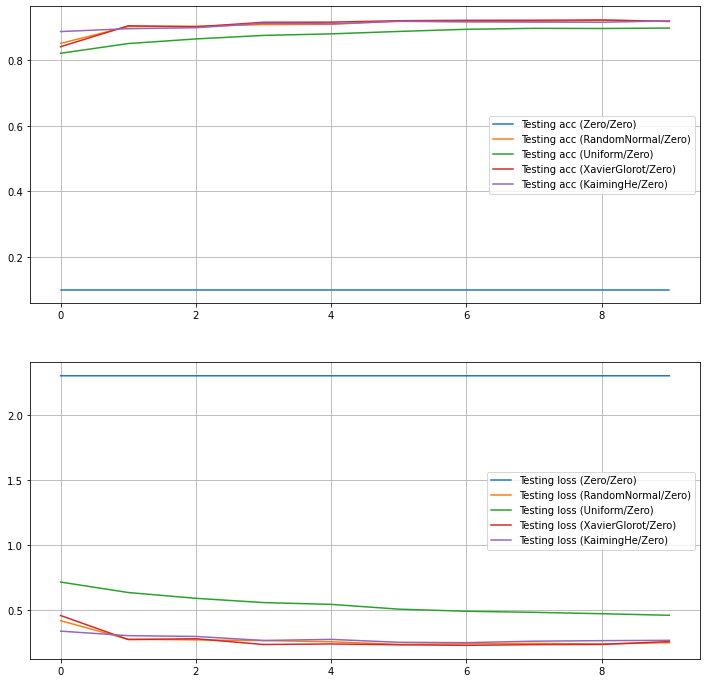

In [27]:
f = plt.figure(figsize=(12,12))
i = 0
axs1 = plt.subplot(211)
axs2 = plt.subplot(212)
for info in results.keys():
    axs1.plot(results[info][1].history['val_accuracy'], label=f'Testing acc {info}')
    axs2.plot(results[info][1].history['val_loss'], label=f'Testing loss {info}')
axs1.legend()
axs2.legend()
axs1.grid()
axs2.grid()
    